# Different means
If parameters need to be averaged over a certain interval, equations for the according mean are usually used. The most prominent one is the arithmetic mean. In this notebook, the different averaging methods will be presented and when they will be used (i.e. if the parameter to be averaged is a tensor.)  
The different averaging methods presented are:  
* the arithmetic mean  
* the harmonic mean  
* the square root mean  
* the geometric mean  
* the hashin strickmann mean(s)
* the effective medium mean  
We will also talk about when to use which averaging method and why.

## Tensors and appropriate means
Imagine a glass body, where one fifth of the body is _cloudy_. This part of the glass body will have a different influence on the transparency of the whole body, depending on the point of view (arrows in the picture). If we look from below, 20 % of the _view_ are obstructed by the _cloudy_ part of the body.  
But what when you look from right? Then, the cloudy part will have a significantly bigger influence on the average light density coming through the body in your eye.
<img src="imgs/tensor.png" width="80%">

Basically, this is why different means are used for different directions of a tensor (be it e.g. permeability or thermal conductivity). If we look from below, the appropriate mean is the __arithmetic mean__, as the proportion of the _cloudy_ part of the body linearly correlates to the _transparency_. However, already a small proportion of a _cloudy_ part has a strong impact on the _transparency_, when we look from right. This is, where we use the __harmonic mean__.  

For further calculations, think of the white and gray to represent strongly different thermal conductivities.  
The white part has a thermal conductivty of $\lambda_w$ = 4.2 W m$^{-1}$K$^{-1}$, while the gray part has a thermal conductivtiy of $\lambda_g$ = 0.7 W m$^{-1}$K$^{-1}$ (which could be coal for example). In the following, we will increase the portion of the gray body from 0 % to 100 % and have a look at the different means and how they _react_.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('ticks')
sns.set_context('poster')

In [2]:
# lambda of white part
lw = 4.2  
# lambda of gray part
lg = 0.7  
# percentage of gray part
phi = np.linspace (0,1,1000)

In [3]:
arithm = (phi*lg + (1-phi)*lw)
harmm = (phi/lg + (1-phi)/lw)**(-1)
geom = lg**phi * lw**(1-phi)
sqrm = (phi*np.sqrt(lg) + (1-phi)*np.sqrt(lw))**2

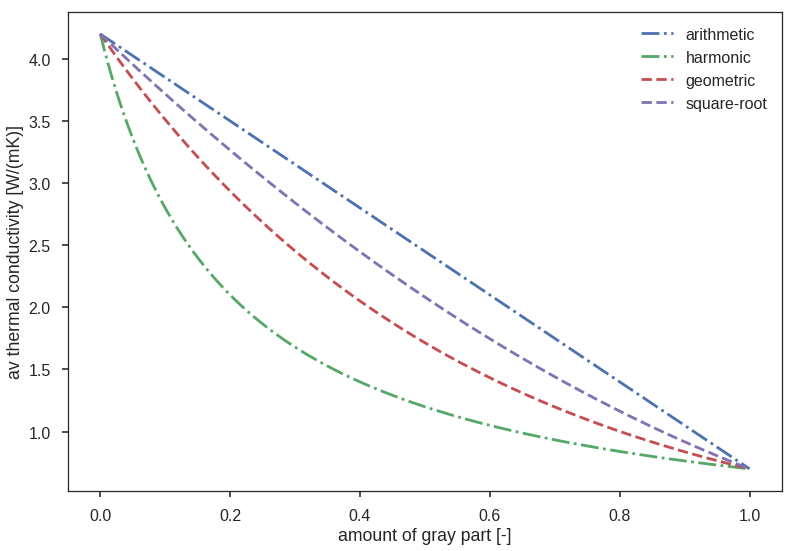

In [4]:
plt.plot(phi,arithm,'-.',phi,harmm,'-.', phi,geom,'--', phi,sqrm,'--')
plt.xlabel('amount of gray part [-]')
plt.ylabel('av thermal conductivity [W/(mK)]')
plt.legend(['arithmetic', 'harmonic', 'geometric', 'square-root'])

The graph shows that the harmonic mean (green line) strongly _reacts_ to already small proportions of _gray_, i.e. low thermal conductivity. Looking at the sketch above, this corresponds to a transport perpendicular to the _layering_, that is from right to left. The arithmetic mean shows a linear decrease in average thermal conductivity with increasing _amount of gray part_.  
We can also call this _amount of gray part_ porosity. Just think of the sketch above as a volume specific representation of porosity. Normally, the pores would be distributed over the whole body, but to visualize that e.g. 20 % of the body are porosity, one could representatively draw it like in the sketch.

If we can substitute _amount of gray part_ with porosity, we can assume that this porosity might be filled with a certain medium, which differs in its properties from the rock matrix. That's the reason, why we have to apply these means in order to assess a representative average property for a porous rock. Now let's further assume that the rock matrix consists just of one rock type. This makes our system a 2 phase system (1: rock matrix, 2: pore filling fluid). Within such a system, we can define the single phases as _continuous phase_ and _discontinuous phase_. Imagine we have a volume of sand saturated with water. You may agree that in this mixture, the _continuous phase_ is the water, and the _discontinuous phase_ is the sand. Vice versa, we have a porous limestone where its porosity mainly comprises isolated vugs. Here, the _continuous phase_ is the limestone matrix, and the _discontinuous phase_ is the vuggy porosity.  

There exist further mixing laws, which build on this concept, namely the upper and lower Hashin-Shtrikman means (HS$^+$ and HS$^-$).  

$$ HS^+ = l_c + \frac{\phi}{\frac{1}{l_{dc}-l_c}+ \frac{1-\phi}{3 l_c}}$$

$$ HS^- = l_{dc} + \frac{1-\phi}{\frac{1}{l_{c}-l_{dc}}+ \frac{\phi}{3 l_{dc}}}$$

In [5]:
# upper Hashin-Shtrikman
hsu = lw + (phi/((1/(lg-lw))+(1-phi)/(3*lw)))
# lower Hashin-Shtrikman
hsl = lg + ((1-phi)/((1/(lw-lg))+phi/(3*lg)))
# mean Hashin-Shtrikman
hsm = 0.5 * (hsu + hsl)

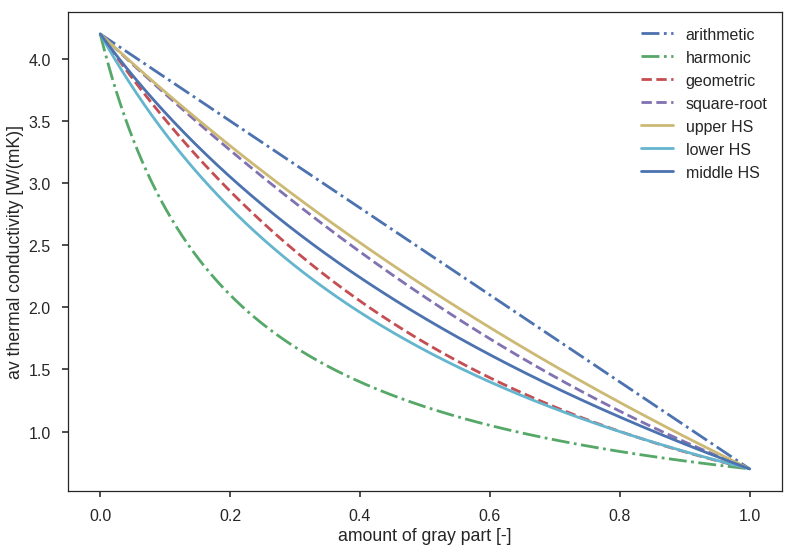

In [7]:
plt.plot(phi,arithm,'-.',phi,harmm,'-.', phi,geom,'--', phi,sqrm,'--', 
        phi, hsu,'-', phi, hsl, '-', phi, hsm, '-')
plt.xlabel('amount of gray part [-]')
plt.ylabel('av thermal conductivity [W/(mK)]')
plt.legend(['arithmetic', 'harmonic', 'geometric', 'square-root',
           'upper HS', 'lower HS', 'middle HS'])

When comparing the HS-laws to other mixing laws, we see that the upper HS approximately equals the square-root mean, whereas the lower HS law approximately corresponds to the geometric mean.